# Implementation of online regressor

Here we'll implement a regressor trained with stochastic gradient descent (SGD).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm                     # progress bar for iterator
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Implement class SGDRegressor. Specification:

* class is inherited from sklearn.base.BaseEstimator
* constructor takes parameters eta – gradient step ( 10−3  by default) and n_epochs – dataset pass count (3 by default)
* constructor also creates mse_ and weights_ lists in order to track mean squared error and weight vector during gradient descent iterations
* Class has fit and predict methods
* The fit method takes matrix X and vector y (numpy.array objects) as parameters, appends column of ones to X on the left side, initializes weight vector w with zeros and then makes n_epochs iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector w in corresponding lists we created in the constructor.
* Additionally the fit method will create w_ variable to store weights which produce minimal mean squared error
* The fit method returns current instance of the * SGDRegressor class, i.e. self
* The predict method takes X matrix, adds column of ones to the left side and returns prediction vector, using weight vector w_, created by the fit method.

In [2]:
class SGDRegressor(BaseEstimator):
    # you code here
    def __init__(self, eta=0.001, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        weights = np.zeros(X.shape[1])
        for iter in tqdm(range(self.n_epochs)):
          for i in range(X.shape[0]):
            new_weights = weights.copy()
            new_weights[0] += self.eta*(y[i] - weights@X[i, :])
            
            for j in range(1, X.shape[1]):
              new_weights[j] += self.eta * (y[i] - weights@X[i, :]) * X[i, j]
            
            weights = new_weights.copy()
            self.weights_.append(weights)
            self.mse_.append(mean_squared_error(y, X@weights))

        self.best_weights = self.weights_[np.argmin(self.mse_)]    
        return self 
                  
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))  
        return X@self.best_weights                


Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [3]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/weights_heights.csv'

df = pd.read_csv(url)
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Text(0, 0.5, 'Weight (lbs)')

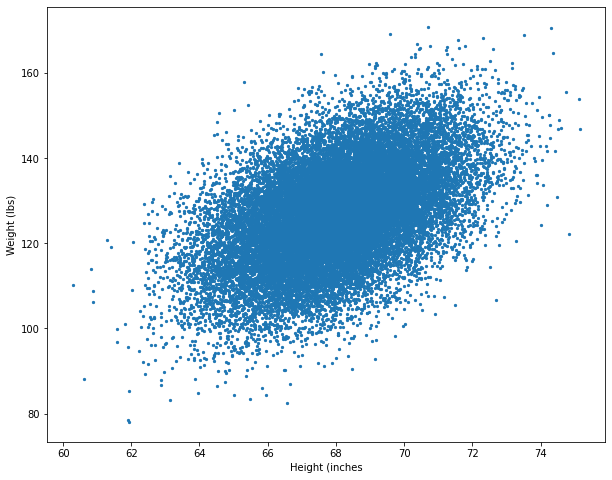

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(x='Height', y='Weight', data=df, s=5)
plt.xlabel('Height (inches')
plt.ylabel('Weight (lbs)')

In [5]:
X, y = df['Weight'].values, df['Height'].values


Perform train/test split and reshape data into 2D array.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=17)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape((-1, 1)))
y_train = y_train.reshape((-1, 1))

In [8]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


SGDRegressor(eta=0.001, n_epochs=3)

Plot mean squared error as a function of the number of updates for the training data.


Text(0, 0.5, 'Mean Squared Error')

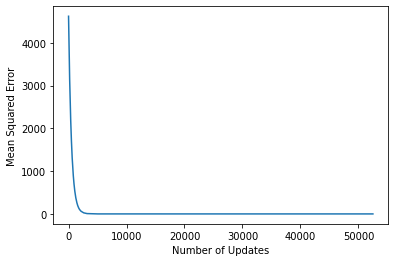

In [ ]:
plt.plot(range(len(sgd_reg.mse_)), sgd_reg.mse_)
plt.xlabel('Number of Updates')
plt.ylabel('Mean Squared Error')

Print the minimal value of mean squared error and the best weights vector.

In [ ]:
print(min(sgd_reg.mse_), sgd_reg.best_weights)

2.7151352406643627 [67.9898497   0.94447605]


Show model weights ( w0  and  w1 ) as a function of the number of updates


Text(0, 0.5, 'w1')

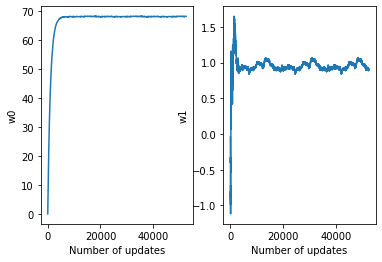

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(range(len(sgd_reg.weights_)), [w[0] for w in sgd_reg.weights_])
ax[0].set_xlabel('Number of updates')
ax[0].set_ylabel('w0')

ax[1].plot(range(len(sgd_reg.weights_)), [w[1] for w in sgd_reg.weights_])
ax[1].set_xlabel('Number of updates')
ax[1].set_ylabel('w1')

Make a prediction for hold-out set (X_test_scaled, y_valid) and check MSE value.

In [ ]:
X_test_scaled = scaler.transform(X_test.reshape((-1, 1)))
y_test = y_test.reshape((-1, 1))

In [ ]:
y_pred = sgd_reg.predict(X_test_scaled)
mean_squared_error(y_test, y_pred)

2.6708681207033784

Evaluate the dataset using LinearRegression class from sklearn.linear_model and MSE for hold-out set.


In [ ]:
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)
mean_squared_error(y_test, lin.predict(X_test_scaled))

2.670830767667634

In [ ]:
display(lin.intercept_, lin.coef_)

array([67.98930835])

array([[0.94537278]])